# Import Libraries

In [7]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
from torchvision import transforms, datasets
from torchvision.utils import save_image
import torch.optim as optim
import random

In [8]:
epoch = 20
learning_rate = 1e-4
load_model = True

DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['airplanes','cars','birds','cats','deer','dogs','frogs','horses','ships','trucks']

print(torch.__version__)
print(DEVICE)

2.0.1+cu118
cpu


# Load Data and Transform

In [9]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

In [10]:
train_set = datasets.CIFAR10(root = './data', download=True, train=True, transform=transform)
val_size = 10000
train_size = len(train_set) - val_size
train_set, val_set = random_split(train_set, [train_size, val_size])

Files already downloaded and verified


In [11]:
test_set = datasets.CIFAR10(root = './data', download=True, train=False, transform=transform)

Files already downloaded and verified


In [12]:
print("Train Set Size: ", train_size)
print("Validation Set Size: ", val_size)
print("Test Set Size: ", len(test_set))

Train Set Size:  40000
Validation Set Size:  10000
Test Set Size:  10000


In [13]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=True)

# Image Example

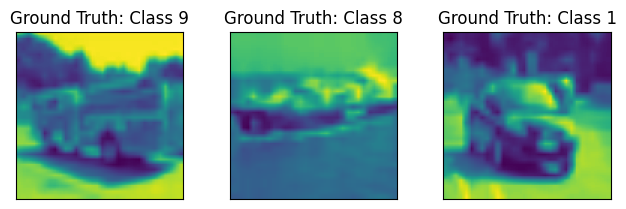

In [ ]:
fig = plt.figure()
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.tight_layout()
  plt.imshow(train_set[i][0][0], interpolation='none')
  plt.title("Ground Truth: Class {}".format(train_set[i][1]))
  plt.xticks([])
  plt.yticks([])

# VGG16

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

    def get_feature_5(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        return x

    def get_feature_4(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        return x

    def get_feature_3(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        return x

    def get_feature_2(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        return x

    def get_feature_1(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        return x


# Load the Model

In [ ]:
model = VGG16().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

In [ ]:
for epochs in range(epoch):
    loss_ep = 0

    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(DEVICE)
        targets = targets.to(DEVICE)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores,targets)
        loss.backward()
        optimizer.step()
        loss_ep += loss.item()
    print(f"Epoch {epochs+1} ] Loss : {loss_ep/len(train_loader):.6f}")

    with torch.no_grad():
        num_correct = 0
        num_samples = 0
        for batch_idx, (data,targets) in enumerate(val_loader):
            data = data.to(DEVICE)
            targets = targets.to(DEVICE)
            ## Forward Pass
            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum()
            num_samples += predictions.size(0)
        print(f"Epoch {epochs+1} ] Accuracy : {float(num_correct) / float(num_samples) * 100:.2f}%")

Epoch 1 ] Loss : 1.914191
Epoch 1 ] Accuracy : 46.85%
Epoch 2 ] Loss : 1.236853
Epoch 2 ] Accuracy : 63.26%
Epoch 3 ] Loss : 0.893202
Epoch 3 ] Accuracy : 68.88%
Epoch 4 ] Loss : 0.666006
Epoch 4 ] Accuracy : 75.34%
Epoch 5 ] Loss : 0.480785
Epoch 5 ] Accuracy : 74.70%
Epoch 6 ] Loss : 0.321764
Epoch 6 ] Accuracy : 76.62%
Epoch 7 ] Loss : 0.201502
Epoch 7 ] Accuracy : 76.36%
Epoch 8 ] Loss : 0.129192
Epoch 8 ] Accuracy : 76.60%
Epoch 9 ] Loss : 0.098914
Epoch 9 ] Accuracy : 75.94%
Epoch 10 ] Loss : 0.080397
Epoch 10 ] Accuracy : 76.70%
Epoch 11 ] Loss : 0.069384
Epoch 11 ] Accuracy : 75.78%
Epoch 12 ] Loss : 0.062695
Epoch 12 ] Accuracy : 76.46%
Epoch 13 ] Loss : 0.054450
Epoch 13 ] Accuracy : 76.54%
Epoch 14 ] Loss : 0.048570
Epoch 14 ] Accuracy : 76.09%
Epoch 15 ] Loss : 0.048069
Epoch 15 ] Accuracy : 76.97%
Epoch 16 ] Loss : 0.043616
Epoch 16 ] Accuracy : 76.63%
Epoch 17 ] Loss : 0.042708
Epoch 17 ] Accuracy : 75.74%
Epoch 18 ] Loss : 0.034704
Epoch 18 ] Accuracy : 74.30%
Epoch 19 ]

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10_model.pth')

In [ ]:
model = VGG16().to(DEVICE)
model.load_state_dict(torch.load('/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10_model.pth'))

<All keys matched successfully>

In [ ]:
features = torch.zeros((0, 512, 14, 14), dtype=torch.float32)
labels = []
with torch.no_grad(): # remove gradients attached to tensors
  for cnt, (data, target) in enumerate(test_loader):
    data = data.to(DEVICE)
    features = torch.cat((features, model.get_feature_5(data).detach().cpu()), 0)
    labels.extend(target.detach().cpu().tolist())
labels = np.array(labels)

In [ ]:
labels = np.array(labels)
torch.save(features,'/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10features_new.t')

with open('/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10labels_new.np','wb') as f:
  np.save(f,labels)

In [ ]:
print(features.shape)

torch.Size([10000, 512, 14, 14])


In [16]:
features = torch.load('/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10features_new.t')
with open('/content/drive/MyDrive/DATA612_Deep_Learning/CIFAR10labels_new.np','rb') as f:
  labels = np.load(f)

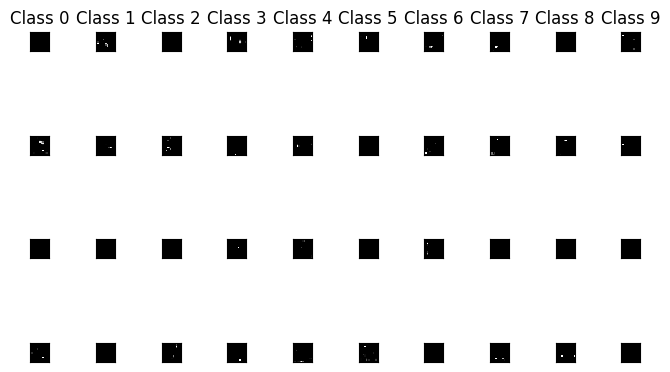

In [23]:
index = 0
show_class = 10
show_num = 4
label_counter = [0 for i in range(show_class)]
fig = plt.figure()
while index<len(labels):
    c = labels[index]
    if c<show_class and label_counter[c]<show_num:
        plt.subplot(show_num, show_class, show_class*label_counter[c]+c+1)
        plt.tight_layout()
        plt.imshow(features[index][random.randint(0,512)], cmap='gray', interpolation='none')
        if label_counter[c]==0:
            plt.title("Class {}".format(c))
        plt.xticks([])
        plt.yticks([])
        label_counter[c] += 1
    if np.sum(label_counter)==show_class*show_num:
        break
    index += 1

In [21]:
from sklearn.manifold import TSNE
from matplotlib import cm

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.680s...
[t-SNE] Computed neighbors for 10000 samples in 809.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.466355
[t-SNE] KL divergence after 250 iterations with early exaggeration: 201.714066
[t-SNE] KL divergence after 1000 iterations: 5.520654


<ipython-input-24-aa1df78d04f5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


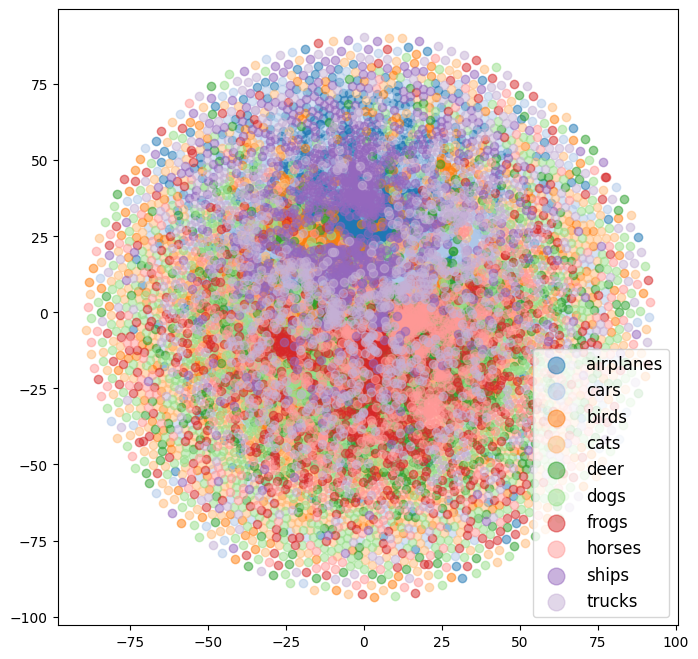

In [24]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(features.view(10000,-1))
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(class_names, fontsize='large', markerscale=2)
plt.show()

In [26]:
data_points = [np.zeros((2,1)) for i in range(10)]
# print(data_points[0].shape)
for j in range(len(labels)):
    for k in range(10):
        if labels[j] == k:
            data_points[k] = np.append(data_points[k],tsne_proj[j].reshape(2,1),axis=1)
            break
intra_variance = [0 for i in range(10)]
inter_variance = [0 for i in range(10)]
for k in range(10):
    intra_variance[k] = sum(np.var(data_points[k], axis=1))
    print("Variance of class {0}: {1}".format(k, intra_variance[k]))

Variance of class 0: 1209.9165541872505
Variance of class 1: 1826.6586606233784
Variance of class 2: 2202.368626843744
Variance of class 3: 3180.343709809812
Variance of class 4: 1815.8075168625592
Variance of class 5: 3022.448592081775
Variance of class 6: 2004.0299015790238
Variance of class 7: 1850.1893374752249
Variance of class 8: 1269.5116347586209
Variance of class 9: 2401.8524938399423


In [28]:
for k in range(10):
  for j in range(10):
    inter_variance = sum(np.var(np.append(data_points[k],data_points[j],axis=1), axis=1))
    print("Inter-variance of classes {} and {}: {}".format(k, j, inter_variance))

Inter-variance of classes 0 and 0: 1209.9165541872505
Inter-variance of classes 0 and 1: 1623.0990361594472
Inter-variance of classes 0 and 2: 1911.0859889649755
Inter-variance of classes 0 and 3: 2597.8831975392504
Inter-variance of classes 0 and 4: 1956.1390609429266
Inter-variance of classes 0 and 5: 2554.501276532589
Inter-variance of classes 0 and 6: 2123.001883831709
Inter-variance of classes 0 and 7: 1989.2303976785238
Inter-variance of classes 0 and 8: 1241.1262923354861
Inter-variance of classes 0 and 9: 1926.4191563294914
Inter-variance of classes 1 and 0: 1623.0990361594475
Inter-variance of classes 1 and 1: 1826.6586606233782
Inter-variance of classes 1 and 2: 2044.6349448007645
Inter-variance of classes 1 and 3: 2610.6034972740727
Inter-variance of classes 1 and 4: 1938.5022534329128
Inter-variance of classes 1 and 5: 2550.6730261010525
Inter-variance of classes 1 and 6: 2075.8871283654207
Inter-variance of classes 1 and 7: 1963.8671381792735
Inter-variance of classes 1 an